## Movie Review Sentiment Analysis

### Import required libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import warnings
warnings.filterwarnings(action="ignore")
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


#### Load the dataset

In [119]:
df=pd.read_csv('Final_movie_reviews_dataset.csv')

In [120]:
df.head() # quickly view the first few rows of a DataFrame. 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Exploratory data analysis

In [121]:
# get the general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66797 entries, 0 to 66796
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     66797 non-null  object
 1   sentiment  66797 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [122]:
# check for missing values
df.isna().sum()

review       0
sentiment    0
dtype: int64

#### drop the duplicate values if any

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
66792,"It's not about safety, it's about honour. \r\...",positive
66793,"""Harold"" (Bob Hoskins) has spent the last ten ...",negative
66794,"I've always been a bad guy, and a bad gambler....",positive
66795,I think I used to like musicals more than I do...,negative


#### check the value count of sentiment column

In [125]:
df['sentiment'].value_counts()

sentiment
positive    36113
negative    30684
Name: count, dtype: int64

#### Pie chart visualization

<Axes: ylabel='count'>

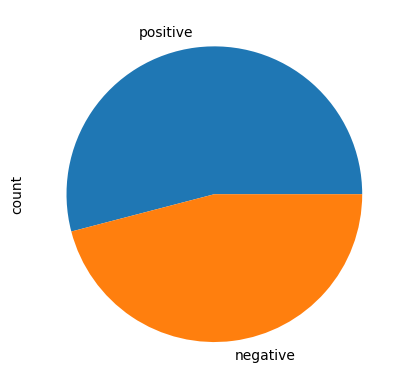

In [126]:

df.sentiment.value_counts().plot(kind="pie")

#### Bar chart visualization

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

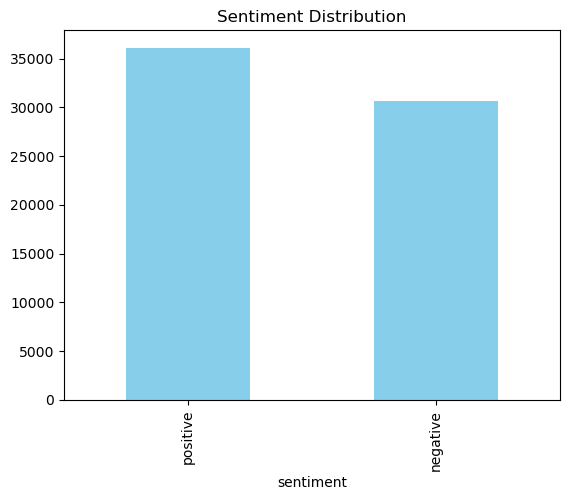

In [127]:

df['sentiment'].value_counts().plot(kind="bar", color="skyblue", title="Sentiment Distribution")


##### since there is no null value in the dataset so no need to drop any row

#### Get summary statistics of a DataFrame 



In [128]:
df.describe()

,review,sentiment
count,66797,66797
unique,66797,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,36113


In [136]:
# Remove HTML tags
def remove_tags(text):
    return BeautifulSoup(str(text), "html.parser").get_text()

# Clean the review text
def clean_review(text):
    if pd.isnull(text):
        return ""
    
    # Remove \r (carriage return), \n (new line), \t (tab)
    text = re.sub(r'[\r\n\t]+', ' ', text)
    
    # Remove unwanted characters except letters, numbers, dots and spaces
    text = re.sub(r'[^\w\s\.]', '', text)
    
    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


In [142]:
# Convert to lowercase first
df['review'] = df['review'].str.lower()

# Remove HTML tags
df['review'] = df['review'].apply(remove_tags)

# Clean review text
df['review'] = df['review'].apply(clean_review)


In [144]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
66792    its not about safety its about honour. its the...
66793    harold bob hoskins has spent the last ten year...
66794    ive always been a bad guy and a bad gambler. f...
66795    i think i used to like musicals more than i do...
66796    despite the reported controversy over who play...
Name: review, Length: 66797, dtype: object

#### Lemmatization

In [145]:
!pip install nltk
nltk.download('punkt_tab') # Includes punkt, wordnet, stopwords, etc.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [146]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_review(text):
    words = word_tokenize(text)
    cleaned_words = [lemmatizer.lemmatize(word) for word in words]  # Only lemmatization
    return ' '.join(cleaned_words)  # Join back to string

df['review']= df['review'].apply(clean_review)


#### wordcloud

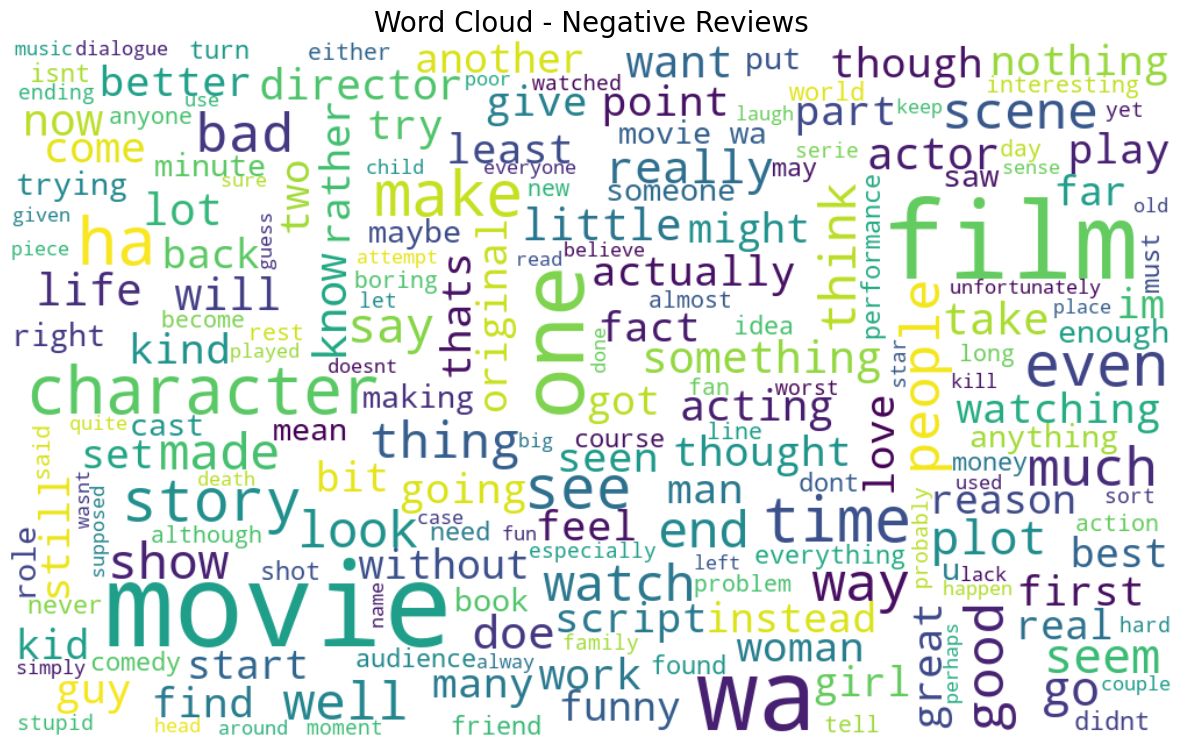

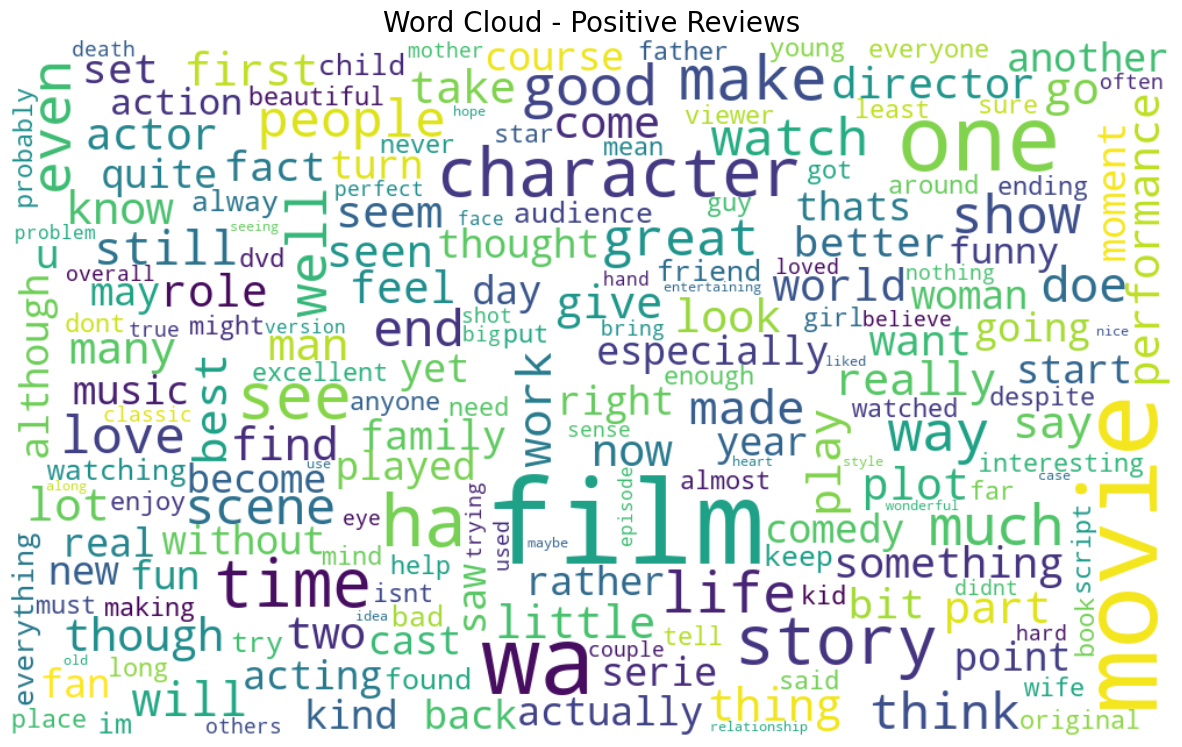

In [148]:
# Join all positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, max_font_size=100, background_color='white')

# Display the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(positive_reviews), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews", fontsize=20)
plt.show()

#### Split the data into training and testing.

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review']) 
y = df['sentiment'].map({'positive': 1, 'negative': 0}) # binary encoding

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model building

#### Logistic Regression model

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create LogisticRegression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.8732035928143712
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6200
           1       0.86      0.90      0.88      7160

    accuracy                           0.87     13360
   macro avg       0.87      0.87      0.87     13360
weighted avg       0.87      0.87      0.87     13360



#### Naive bayes model

In [154]:
from sklearn.naive_bayes import MultinomialNB

# Create Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_preds = nb_model.predict(X_test)

# Evaluate performance
print("\n=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


=== Naive Bayes ===
Accuracy: 0.8306137724550898
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      6200
           1       0.81      0.89      0.85      7160

    accuracy                           0.83     13360
   macro avg       0.83      0.83      0.83     13360
weighted avg       0.83      0.83      0.83     13360



#### Random Forest model

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Random Forest model with restricted complexity
rf_model = RandomForestClassifier(
    n_estimators=50,           # Fewer trees
    max_depth=5,               # Limit the depth of trees
    min_samples_split=10,      # Require more samples to split
    min_samples_leaf=5,        # Require more samples in leaf nodes
    max_features='sqrt',       # Consider fewer features at each split
    random_state=45
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("\n=== Random Forest (Tuned) ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


=== Random Forest (Tuned) ===
Accuracy: 0.69812874251497
              precision    recall  f1-score   support

           0       0.93      0.38      0.54      6200
           1       0.64      0.98      0.78      7160

    accuracy                           0.70     13360
   macro avg       0.79      0.68      0.66     13360
weighted avg       0.78      0.70      0.66     13360



#### XGBoost model

In [156]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42,n_estimators=50, max_depth=5, learning_rate=0.2)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate performance
print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


=== XGBoost ===
Accuracy: 0.8165419161676647
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      6200
           1       0.79      0.89      0.84      7160

    accuracy                           0.82     13360
   macro avg       0.82      0.81      0.81     13360
weighted avg       0.82      0.82      0.81     13360



In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
ada_pred = ada_model.predict(X_test)

# Evaluate performance
print("\n=== AdaBoost ===")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))



=== AdaBoost ===
Accuracy: 0.7505239520958084
              precision    recall  f1-score   support

           0       0.83      0.58      0.68      6200
           1       0.71      0.90      0.79      7160

    accuracy                           0.75     13360
   macro avg       0.77      0.74      0.74     13360
weighted avg       0.77      0.75      0.74     13360



#### Vectorizer model

In [163]:
import joblib
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['review'])  # Train vectorizer

#### Accuracy on training data 

In [158]:
# Logistic Regression training accuracy
log_train_preds = model.predict(X_train)

log_train_accuracy = accuracy_score(y_train, log_train_preds)
print("Logistic Regression - Training Accuracy:", log_train_accuracy)

# Naive Bayes training accuracy
nb_train_preds = nb_model.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
print("Naive Bayes - Training Accuracy:", nb_train_accuracy)

# Random Forest training accuracy
rf_train_preds = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
print("Random Forest - Training Accuracy:", rf_train_accuracy)

# XGBoost training accuracy
xgb_train_preds = xgb_model.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
print("XGBoost - Training Accuracy:", xgb_train_accuracy)

# AdaBoost training accuracy
ada_train_preds = ada_model.predict(X_train)
ada_train_accuracy = accuracy_score(y_train, ada_train_preds)
print("AdaBoost - Training Accuracy:", ada_train_accuracy)

Logistic Regression - Training Accuracy: 0.8923405131276082
Naive Bayes - Training Accuracy: 0.8412710294365328
Random Forest - Training Accuracy: 0.7052604000973108
XGBoost - Training Accuracy: 0.8385201265041077
AdaBoost - Training Accuracy: 0.7492187061399405


#### Selection of best model

In [159]:
models = {
    "AdaBoost": ada_model,
    "RandomForest": rf_model,
    "LogisticRegression": model,
    "XGBoost": xgb_model,
    "NaiveBayes": nb_model
}

In [38]:
from sklearn.metrics import accuracy_score

accuracies = {}


for name, model in models.items():
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


AdaBoost Accuracy: 0.7505
RandomForest Accuracy: 0.6981
LogisticRegression Accuracy: 0.8306
XGBoost Accuracy: 0.8165
NaiveBayes Accuracy: 0.8306


In [39]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy {accuracies[best_model_name]:.4f}")



Best Model: LogisticRegression with accuracy 0.8306


#### dump the model

In [160]:
import pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


In [164]:
# save vectorizer
joblib.dump(vectorizer,'vectorizer.pkl')
print("Vectorizer trained and saved as 'vectorizer.pkl'")

Vectorizer trained and saved as 'vectorizer.pkl'
